In [1]:
using XLSX
using Distributed
using Plots
using JLD
using LaTeXStrings


include("../src/FCSeqTools.jl")
include("../src/functions.jl")

natural_sequences = do_number_matrix_prot(do_letter_matrix("../data/CM_130530_MC.fasta"), 0.2);
ref_seq = natural_sequences[1,:];

## Single site entropy: *pseudo_count = 0.5*

In [3]:
# CREATE FOLDERS AND LOAD PARAMETERS
folder_name = "pseudo_count=0.5__init_pseudo_count=0.1"
rm(joinpath("figures/entropy", folder_name), force=true, recursive=true)
mkdir(joinpath("figures/entropy", folder_name))
path_05_01 = joinpath("figures/entropy", folder_name)


method = "cumulative"
fraction = 0.3
stop = 0.9
pseudo_count = 0.5
init_pseudo_count = 0.01
notebook = "1"

folder_path = "../training/" * method * string(fraction) * "_stop=" * string(stop) * "_reg="*string(pseudo_count)*"_h_ps-count=" * string(init_pseudo_count) * "nbook="*notebook


fields_05_01 = JLD.load(folder_path*"/h.jld")["data"]
couplings_05_01 = JLD.load(folder_path*"/Jij.jld")["data"];

LoadError: IOError: mkdir("figures/entropy/pseudo_count=0.5__init_pseudo_count=0.1"; mode=0o777): no such file or directory (ENOENT)

In [ ]:
q = 21
threshold = 0.8

prof_site_entropy_05_01 = site_entropy_vector(natural_sequences, q, init_pseudo_count, threshold);
EAA_site_entropy_05_01 = full_model_site_entropy(q, ref_seq, fields_05_01, couplings_05_01, 0.0, 0.0);

In [ ]:
histogram(prof_site_entropy_05_01, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)

savefig(joinpath(path_05_01, "profile_entropy.png"));

In [ ]:
histogram(EAA_site_entropy_05_01, bins=40, title= "EAA Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)

savefig(joinpath(path_05_01, "EAA_entropy.png"));

# Single-site entropies: **pseudo-count = 0.05**

In [ ]:
# CREATE FOLDERS AND LOAD PARAMETERS
folder_name2 = "pseudo_count=0.05"
rm(joinpath("figures/entropy", folder_name2), force=true, recursive=true)
mkdir(joinpath("figures/entropy", folder_name2))
path_005 = joinpath("figures/entropy", folder_name2)

method = "cumulative"
fraction = 0.3
stop = 0.9
folder_name = method*string(fraction)*"_stop="*string(stop)

folder_path = "../training/"*folder_name*"/"  

fields_005 = JLD.load(folder_path*"h.jld")["data"]
couplings_005 = JLD.load(folder_path*"Jij.jld")["data"];

q = 21
threshold = 0.2;

In [ ]:
prof_site_entropy_005 = site_entropy_vector(natural_sequences, q, 0.5, 0);
EAA_site_entropy_005 = full_model_site_entropy(q, ref_seq, fields_005, couplings_005, 0, 0);

In [ ]:
histogram(prof_site_entropy_005, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)

savefig(joinpath(path_005, "prof_entropy.png"));

In [ ]:
histogram(EAA_site_entropy_005, bins=50, title= "EAA Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
savefig(joinpath(path_005, "EAA_entropy.png"));

# other case

In [ ]:
# CREATE FOLDERS AND LOAD PARAMETERS
folder_name = "pseudo_count=0.5"
rm(joinpath("figures/entropy", folder_name), force=true, recursive=true)
mkdir(joinpath("figures/entropy", folder_name))
path_05 = joinpath("figures/entropy", folder_name)


method = "cumulative"
fraction = 0.3
stop = 0.9
pseudo_count = 0.5
init_pseudo_count = 0.01
notebook = "1"

folder_path = "../training/" * method * string(fraction) * "_stop=" * string(stop) * "_reg="*string(pseudo_count)

fields_05 = JLD.load(folder_path*"/h.jld")["data"]
couplings_05 = JLD.load(folder_path*"/Jij.jld")["data"];

In [ ]:
prof_site_entropy_05 = site_entropy_vector(natural_sequences, q, 0.5, 0);
EAA_site_entropy_05 = full_model_site_entropy(q, ref_seq, fields_05, couplings_05, 0, 0);

In [ ]:
histogram(prof_site_entropy_05, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)

savefig(joinpath(path_05, "profile_entropy.png"));

In [ ]:
histogram(EAA_site_entropy_05, bins=50, title= "EAA Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)

savefig(joinpath(path_05, "EAA_entropy.png"));

# Scatter Plot

In [ ]:
x, y = EAA_site_entropy_05, EAA_site_entropy_005
x_label, y_label = "entropy "*L"(\alpha=0.5)", "entropy "*L"(\alpha=0.05)"
title = "Context dependent site entropy"


plot(  histogram(x, nbins=100, alpha=0.5, orientation=:vertical,label=:false, xticks=[], ylabel="counts", title = title),   
       plot(framestyle = :none),
       scatter(x, y, markershape=:circle, label=:false, xlabel=x_label, ylabel=y_label, alpha=0.2),
       histogram(y, nbins=100, alpha=0.5, orientation=:horizontal, label=:false, yticks=[], xlabel="counts"),
       link = :both, 
       size=(1000, 1000), 
       spacing=0.1, 
       )
savefig(joinpath(path_05, "comparison(0.5_vs_0.05).png"));

In [ ]:
println("Pearson(S_0.5, S_0,05) = ",cor(EAA_site_entropy_05, EAA_site_entropy_005))
println("Spearman(S_0.5, S_0,05) = ",corspearman(EAA_site_entropy_05, EAA_site_entropy_005))

Pearson(S_0.5, S_0,05) = 0.43350160736411736
Spearman(S_0.5, S_0,05) = 0.5618556701030928


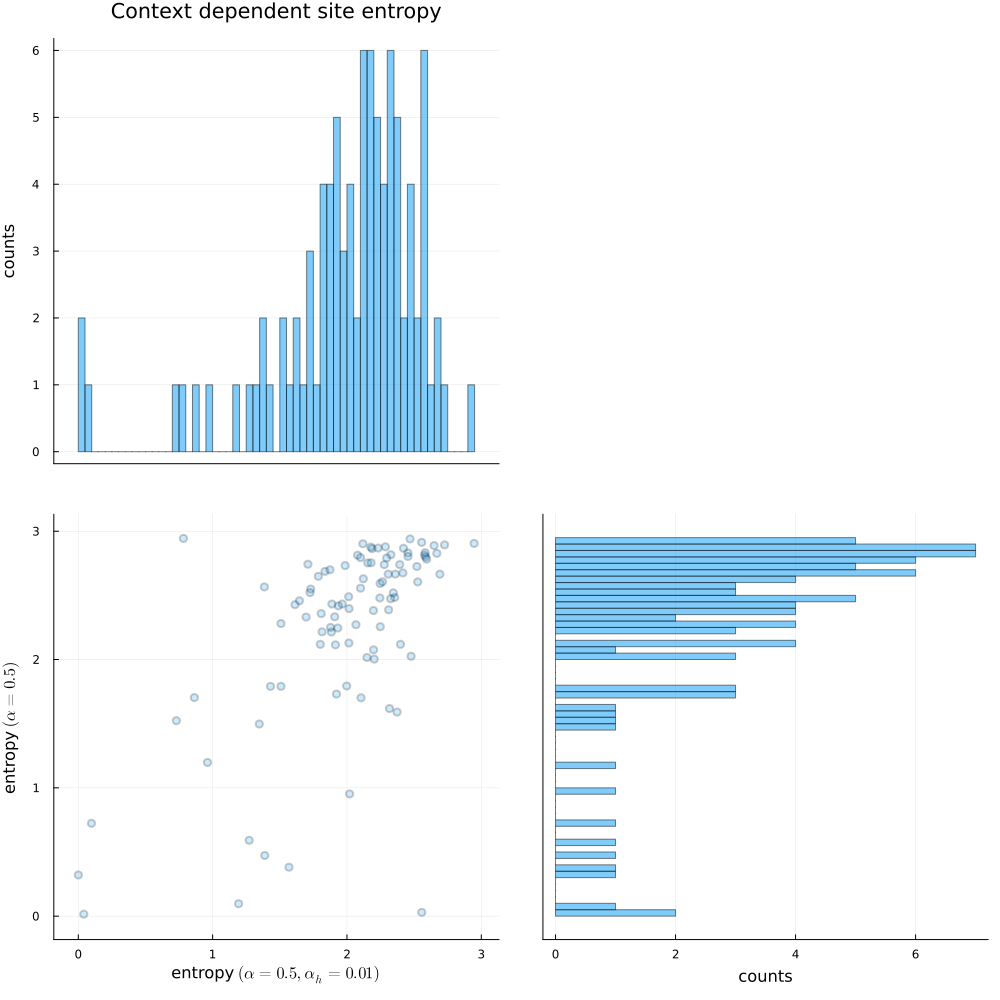

In [ ]:
x, y = EAA_site_entropy_05_01, EAA_site_entropy_05
x_label, y_label = "entropy "*L"(\alpha=0.5, \alpha_{h}=0.01)", "entropy "*L"(\alpha=0.5)"
title = "Context dependent site entropy"


plot(  histogram(x, nbins=100, alpha=0.5, orientation=:vertical,label=:false, xticks=[], ylabel="counts", title = title),   
       plot(framestyle = :none),
       scatter(x, y, markershape=:circle, label=:false, xlabel=x_label, ylabel=y_label, alpha=0.2),
       histogram(y, nbins=100, alpha=0.5, orientation=:horizontal, label=:false, yticks=[], xlabel="counts"),
       link = :both, 
       size=(1000, 1000), 
       spacing=0.1, 
       )

In [ ]:
println("Pearson(S_0.5_0.1, S_0.05) = ",cor(EAA_site_entropy_05_01, EAA_site_entropy_005))
println("Spearman(S_0.5_0.1, S_0.05) = ",corspearman(EAA_site_entropy_05_01, EAA_site_entropy_005))

Pearson(S_0.5_0.1, S_0,05) = 0.5501219292291918
Spearman(S_0.5_0.1, S_0,05) = 0.6209034183396636


# Varying Pseudo-Count

In [8]:
using XLSX
using Distributed
using Plots
using JLD
using LaTeXStrings


include("../src/FCSeqTools.jl")
include("../src/functions.jl");

In [3]:
# SELECT DATA ############################################################################
alignment = "CM_alignment"   # "Betalactamases"  
sigla =  "(CM)"    # "(BL)"                                         
method = "cumulative"
test = "main_test"
stop = 0.9
fraction = 0.3
alphas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]#, 0.95]
l = length(alphas)
nbk = 1
threshold = 0
α_h = 0.01 # initial pseudo count
#########################################################################################
q = 21
sigla == "(CM)"  ? L = 96 : L = 222
sigla == "(CM)"  ? MSA = "CM_130530_MC.fasta" : MSA = "Betalactamases_VIM-NDM.fasta";
#########################################################################################

### Context dependent entropies of the natural sequences

In [6]:
rm(joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Wild_Type"), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Wild_Type"))
figure_path1 = joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Wild_Type");

In [7]:
natural_sequences = do_number_matrix_prot(do_letter_matrix("../data/"*MSA), 0.2);
ref_seq = natural_sequences[1,:];
full_entropies_vector = Vector{Array{Float64,1}}(undef, l)

idx = 0
for α in alphas
    idx += 1
    println("step: ",idx)
    folder = "../training/" * alignment * "/" * method * "/" * test * "/"
    path_α_nbk = folder *method*string(fraction)*"_stop="*string(stop)*"_reg="*string(α)*"_nb"*string(nbk)
    fields = JLD.load(path_α_nbk * "/h.jld")["data"]
    couplings = JLD.load(path_α_nbk * "/Jij.jld")["data"];

    if idx == 1
        profile_entropies_vector = site_entropy_vector(natural_sequences, q, α_h, threshold);
        histogram(profile_entropies_vector, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
        savefig(joinpath(figure_path1, "Profile Model:single_site_entropy.png"));  
    end

    full_entropies_vector[idx] = full_model_site_entropy(q, ref_seq, fields, couplings, 0, threshold);
    histogram(full_entropies_vector[idx], bins=50, title= "EAA (α="*string(α)*"): context dependent entropy", xlabel="site entropy", ylabel="counts", label =:false)
    savefig(joinpath(figure_path1, "(α="*string(α)*")context_sp_entropy.png"));  
end

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10


### Context dependent entropy of the DMS over the generated sequences

In [4]:
rm(joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Gen_Seq_DMS"), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Gen_Seq_DMS"))
figure_path2 = joinpath("figures/"* alignment * "/context.dep.Entropy_vs_pseudo-count/w.r.t.Gen_Seq_DMS");

In [37]:
using XLSX
using Distributed
using Plots
using JLD
using LaTeXStrings


include("../src/FCSeqTools.jl")
include("../src/functions.jl");

In [42]:
idx = 0
n_gen_seq = 100
full_entropies_vector1 = zeros(l, L)
for α in alphas
    flush(stdout)   
    idx += 1
    println("step: ",idx)
    folder = "../training/" * alignment * "/" * method * "/" * test * "/"
    path_α_nbk = folder *method*string(fraction)*"_stop="*string(stop)*"_reg="*string(α)*"_nb"*string(nbk)
    fields = JLD.load(path_α_nbk * "/h.jld")["data"]
    couplings = JLD.load(path_α_nbk * "/Jij.jld")["data"];
    contact_list = JLD.load(path_α_nbk * "/contact_list.jld")["data"]
    site_degree = JLD.load(path_α_nbk * "/site_degree.jld")["data"];
    gen_seq = JLD.load(path_α_nbk * "/generated_sequences.jld")["data"][1:n_gen_seq,:]
    #gen_seq = JLD.load(path_α_nbk * "/generated_sequences.jld")["data"][90:n_gen_seq,:]


    L = length(gen_seq[1,:])
    M = size(gen_seq,1)
    println(M)
    for n_seq ∈ 1:M
        #println("idx: ",n_seq)
        seq = gen_seq[n_seq,:]
        full_entropies_vector1[idx,:] .+= full_model_site_entropy(q, seq, fields, couplings, 0,  contact_list, site_degree)
    end
    
    full_entropies_vector1[idx,:] /= M
    histogram(full_entropies_vector1[idx,:], bins=50, title= "EAA (α="*string(α)*"): context dependent entropy over generate seqs", xlabel="site entropy", ylabel="counts", label =:false)
    savefig(joinpath(figure_path2, "(α="*string(α)*")context_sp_entropy.png"));
end


step: 1
100
step: 2
100
step: 3
100
step: 4
100
step: 5
100
step: 6
100
step: 7
100
step: 8
100
step: 9
100
step: 10
100


In [16]:
savefig(joinpath(figure_path2, "(α="*string(0.05)*")context_sp_entropy.png"));